# Chapter 7. Unsupervised learning

Clustering

Reduce the dimension 

An extension of the exploratory data analysis


**Unsupervised learning and prediction:**
1. In some cases, we want to predict a category in the absence of any labeled data. For example, we might want to predict the type of vegetation in an area from a set of satellite sensory data. Since we don’t have a response variable to train a model, clustering gives us a way to identify common patterns and categorize the regions.
2. Clustering is an especially important tool for the “cold-start problem.” In this type of problem, such as launching a new marketing campaign or identifying potential new types of fraud or spam, we initially may not have any response to train a model. Over time, as data is collected, we can learn more about the system and build a traditional predictive model. But clustering helps us start the learning process more quickly by identifying population segments
3. Unsupervised learning is also important as a building block for regression and classification techniques. With big data, if a small subpopulation is not well represented in the overall population, the trained model may not perform well for that subpopulation. With clustering, it is possible to identify and label subpopulations. Separate models can then be fit to the different subpopulations. Alternatively, the subpopulation can be represented with its own feature, forcing the overall model to explicitly consider subpopulation identity as a predictor.

## 7.1 Principal components analysis

Often, variables will vary together (covary), and some of the variation in one is actually duplicated by variation in another (e.g., restaurant checks and tips). Principal components analysis (PCA) is a technique to discover the way in which numeric variables covary

The idea in PCA is to combine multiple numeric predictor variables into a smaller set of variables, which are weighted linear combinations of the original set. The smaller set of variables, the principal components, “explains” most of the variability of the full set of variables, reducing the dimension of the data. The weights used to form the principal components reveal the relative contributions of the original variables to the new principal components

PCA can be viewed as the unsupervised version of linear discriminant analysis

### A simple example

For two variables, X1 and X2, there are two principal components Zi (i = 1 or 2): Zi = wi,1X1 + wi,2X2

The weights (wi,1,wi,2) are known as the component loadings. These transform the original variables into the principal components. The first principal component, Z1, is the linear combination that best explains the total variation. The second principal component, Z2, is orthogonal to the first and explains as much of the remaining variation as it can. (If there were additional components, each additional one would be orthogonal to the others.)

Note: It is also common to compute principal components on deviations from the means of the predictor variables, rather than on the values themselves

In [5]:
import numpy as np
import pandas as pd

sp500_px = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/sp500_data.csv',
                       index_col = 0)
oil_px = sp500_px[['XOM', 'CVX']]
oil_px.head()

,XOM,CVX
1993-01-29,-0.016991,0.072921
1993-02-01,0.016991,0.102089
1993-02-02,0.084954,0.029168
1993-02-03,0.067964,0.058337
1993-02-04,0.034378,0.044272


In [6]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
loadings

,XOM,CVX
0,-0.664711,-0.747101
1,0.747101,-0.664711


The weights for CVX and XOM for the first principal component are –0.747 and –0.665, and for the second principal component they are 0.665 and –0.747. How to interpret this? The first principal component is essentially an average of CVX and XOM, reflecting the correlation between the two energy companies. The second principal component measures when the stock prices of CVX and XOM diverge.

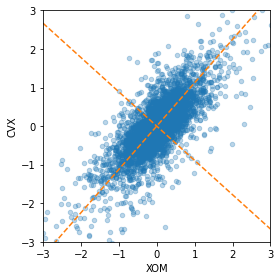

In [10]:
import matplotlib.pyplot as plt

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

plt.tight_layout()
plt.show()

Note: The weights for the first principal component are both negative, but reversing the sign of all the weights does not change the principal component. For example, using weights of 0.747 and 0.665 for the first principal component is equivalent to the negative weights, just as an infinite line defined by the origin and 1,1 is the same as one defined by the origin and –1, –1.

### Computing the principal components

Going from two variables to more variables is straightforward. For the first component, simply include the additional predictor variables in the linear combination, assigning weights that optimize the collection of the covariation from all the predictor variables into this first principal component (covariance is the statistical term). Calculation of principal components is a classic statistical method, relying on either the correlation matrix of the data or the covariance matrix, and it executes rapidly, not relying on iteration. As noted earlier, principal components analysis works only with numeric variables, not categorical ones. The full process can be described as follows:
1. In creating the first principal component, PCA arrives at the linear combination of predictor variables that maximizes the percent of total variance explained.
2. This linear combination then becomes the first “new” predictor, Z1.
3. PCA repeats this process, using the same variables with different weights, to create a second new predictor, Z . The weighting is done such that Z and Z are uncorrelated.
4. The process continues until you have as many new variables, or components, Zi as original variables Xi
5. Choose to retain as many components as are needed to account for most of the variance
6. The result so far is a set of weights for each component. The final step is to convert the original data into new principal component scores by applying the weights to the original values. These new scores can then be used as the reduced set of predictor variables

### Interpreting principal components

The nature of the principal components often reveals information about the structure of the data. Screeplot to visualize the relative importance of principal components (the name derives from the resemblance of the plot to a scree slope; here, the y-axis is the eigenvalue).

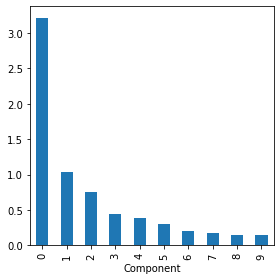

In [11]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
        'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

In [12]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], 
                        columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

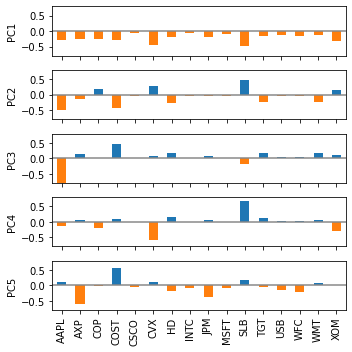

In [13]:
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

The loadings for the first principal component have the same sign: this is typical for data in which all the columns share a common factor (in this case, the overall stock market trend). The second component captures the price changes of energy stocks as compared to the other stocks. The third component is primarily a contrast in the movements of Apple and CostCo. The fourth component contrasts the movements of Schlumberger (SLB) to the other energy stocks. Finally, the fifth component is mostly dominated by financial companies.

**How many components to choose:** If your goal is to reduce the dimension of the data, you must decide how many principal components to select. The most common approach is to use an ad hoc rule to select the components that explain “most” of the variance. You can do this visually through the screeplot. Alternatively, you could select the top components such that the cumulative variance exceeds a threshold, such as 80%. Also, you can inspect the loadings to determine if the component has an intuitive interpretation. Cross-validation provides a more formal method to select the number of significant components

### Correspondence analysis

PCA cannot be used for categorical data; however, a somewhat related technique is correspondence analysis. The goal is to recognize associations between categories, or between categorical features. The similarities between correspondence analysis and principal components analysis are mainly under the hood—the matrix algebra for dimension scaling. Correspondence analysis is used mainly for graphical analysis of low-dimensional categorical data and is not used in the same way that PCA is for dimension reduction as a preparatory step with big data

The input can be seen as a table, with rows representing one variable and columns another, and the cells representing record counts. The output (after some matrix algebra) is a biplot—a scatterplot with axes scaled (and with percentages indicating how much variance is explained by that dimension). The meaning of the units on the axes is not intuitively connected to the original data, and the main value of the scatterplot is to illustrate graphically variables that are associated with one another (by proximity on the plot)

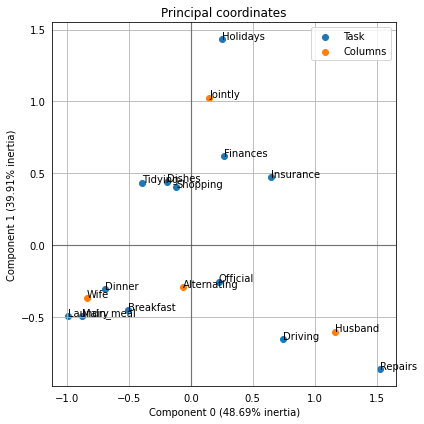

In [19]:
import prince

housetasks = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/housetasks.csv',
                         index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ca.plot_coordinates(housetasks, figsize=(6, 6))
plt.tight_layout()
plt.show()

In [20]:
housetasks

,Wife,Alternating,Husband,Jointly
Task,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


## 7.2 K-means clustering

### A simple example 

### K-means algorithm

### Interpreting the clusters

### Selecting the number of clusters

## 7.3 Hierarchical clustering

## 7.4 Model-based clustering

## 7.5 Scaling and categorical variables